In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES - DATA COMPOSITION 2 (80-10-10).csv')
df.head(5)

,Month,Tourist Arrival,Class
0,01/01/2008,399556,Train
1,01/02/2008,411032,Train
2,01/03/2008,414332,Train
3,01/04/2008,395900,Train
4,01/05/2008,366387,Train


In [3]:
import datetime
df['Month'] = pd.to_datetime(df['Month'])
df['Month'] = df['Month'].dt.strftime('%d.%m.%Y')
df['Month'] = pd.DatetimeIndex(df['Month']).dayofyear

In [4]:
x=df['Month']
y=df['Tourist Arrival']

In [5]:
train = df[df["Class"] == "Train"]
validation = df[df["Class"] == "Validation"]
test = df[df["Class"] == "Test"]
print(train.shape)
print(validation.shape)
print(test.shape)

(148, 3)
(19, 3)
(19, 3)


In [6]:
train = train.drop(['Class'], axis=1)
validation = validation.drop(['Class'], axis=1)
test = test.drop(['Class'], axis=1)

In [7]:
target_column_train = ['Tourist Arrival']
predictors_train = list(set(list(train.columns))-set(target_column_train))

x_train = train[predictors_train].values
y_train = train[target_column_train].values

print(x_train.shape)
print(y_train.shape)

(148, 1)
(148, 1)


In [8]:
target_column_validation = ['Tourist Arrival'] 
predictors_validation = list(set(list(validation.columns))-set(target_column_validation))

x_validation = validation[predictors_validation].values
y_validation = validation[target_column_validation].values

print(x_validation.shape)
print(y_validation.shape)

(19, 1)
(19, 1)


In [9]:
target_column_test = ['Tourist Arrival'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

x_test = test[predictors_test].values
y_test = test[target_column_test].values

print(x_test.shape)
print(y_test.shape)

(19, 1)
(19, 1)


In [10]:
from sklearn import model_selection
from sklearn.svm import SVR
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
import statistics
from scipy import stats
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [11]:
svr_rbf = SVR(kernel='sigmoid', C=10, epsilon=0.05)
svr_rbf.fit(x_train, y_train) 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=10, epsilon=0.05, kernel='sigmoid')

In [12]:
params = {'C':[0.1, 1, 10, 100, 1000],
          'epsilon':[1, 0.1, 0.001, 0.0001, 0.00001]}

In [13]:
grid = GridSearchCV(svr_rbf,param_grid=params,cv=5,scoring='r2',verbose=1,return_train_score=True)


In [14]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, estimator=SVR(C=10, epsilon=0.05, kernel='sigmoid'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [1, 0.1, 0.001, 0.0001, 1e-05]},
             return_train_score=True, scoring='r2', verbose=1)

In [15]:
grid.best_estimator_

SVR(C=1000, epsilon=1e-05, kernel='sigmoid')

In [16]:
svr_best=SVR(kernel='sigmoid', C=1000, epsilon=1e-05)
svr_best.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000, epsilon=1e-05, kernel='sigmoid')

In [17]:
svr_best.score(x_validation,y_validation)


-48113235.89296108

In [18]:
y_pred=svr_best.predict(x_test)
print(y_pred)

[619011.57866217 624441.96795849 622915.95474887 621188.92739033
 619864.59140851 619197.9933402  618884.47839127 618770.80056614
 618753.98675814 618790.77587269 618853.06977754 618930.99900995
 619011.57866217 624441.96795849 622915.95474887 621188.92739033
 619864.59140851 619197.9933402  618884.47839127]


In [19]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 396545.3116622718


In [20]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 349478.5069465503


In [21]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 40.125592268003274


In [22]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 1583.4309093365312


In [23]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : 10520.028945588803


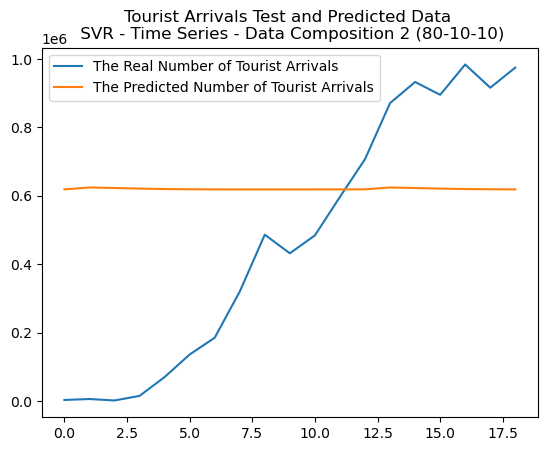

In [24]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n SVR - Time Series - Data Composition 2 (80-10-10)")
plt.legend()
plt.show()